In [1]:
from imports import *
import traces_rdf
%matplotlib inline

Welcome to JupyROOT 6.28/10


In [2]:
# Use traces with large trigger shifts -- P*S1 channels have -100 to -400 us shifts
trigShift = 'data/FastDMC/TriggerShift/iZIP5-TrigShift_00241024_0000.root'

In [3]:
def bestI0(file, sensor, event, iChan):
    """Compute 'adaptive I0' for trace, scanning the supposed pre-trigger
       baseline for the range of values with the smallest RMS.  This
       should exclude the region where the real trace starts.  Returns
       computed I0 value, along with index of average and RMS value."""
    bins, trace = traces_rdf.loadTrace(file, event, iChan, sensor)

    start = 5                   # Need some bins to compute RMS

    rms = [np.std(trace[:i],ddof=1) for i in range(start,len(trace))]
    eom = [np.std(trace[:i])/sqrt(i) for i in range(start,len(trace))]
    ibest = eom.index(min(eom))+start

    return np.mean(trace[:ibest]), ibest, eom[ibest]

In [4]:
event=0
iChan=7
adaptiveI0, ibase, err = bestI0(trigShift, "TES", event, iChan)

In [5]:
print("Average from 0 to bin",ibase,"=", adaptiveI0,"+-",err)

Average from 0 to bin 566 = 21.040735428235163 +- 2.709894819469938e-05


In [6]:
chans = traces_rdf.getChannels(trigShift, "TES", event)
for i in range(len(chans)):
    I0, ibase, err = bestI0(trigShift, "TES", event, i)
    print(chans[i],": I0 =",I0,"+-",err," to bin",ibase)

PAS1 : I0 = 21.04073213970993 +- 4.725776182017341e-05  to bin 253
PBS1 : I0 = 21.040733417186328 +- 4.811107573084452e-05  to bin 315
PCS1 : I0 = 21.040734319465166 +- 4.0587021073258274e-05  to bin 378
PDS1 : I0 = 21.040734078849784 +- 3.4959212798426e-05  to bin 440
PAS2 : I0 = 21.040735792621902 +- 1.6168090715133293e-05  to bin 753
PBS2 : I0 = 21.040735496349328 +- 2.2479907726904052e-05  to bin 691
PCS2 : I0 = 21.04073515201484 +- 2.4478813449738793e-05  to bin 628
PDS2 : I0 = 21.040735428235163 +- 2.709894819469938e-05  to bin 566


In [10]:
bins, trace = traces_rdf.loadTrace(trigShift, event, iChan, "TES")
eom = [0]*5 + [np.std(trace[:i],ddof=1)/sqrt(i) for i in range(5,len(trace))]
runningI0 = [np.mean(trace[:i]) for i in range(1,len(trace))]

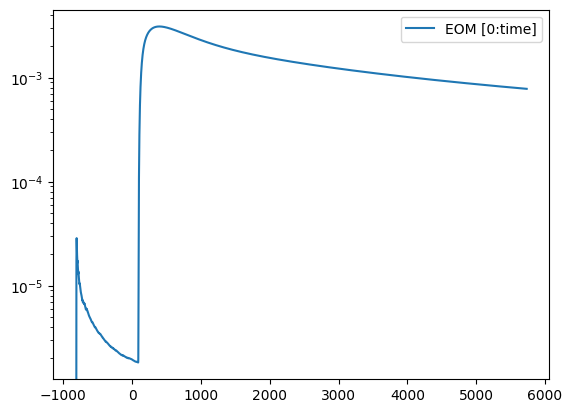

In [11]:
plt.plot(bins, eom, label="EOM [0:time]")
plt.yscale('log')
plt.legend()

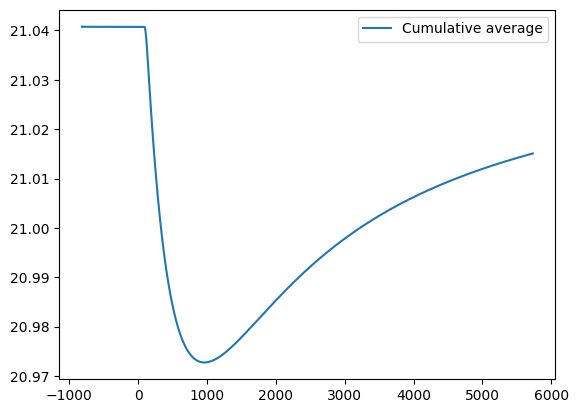

In [9]:
plt.plot(bins, runningI0, label="Cumulative average")
plt.legend()